In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
%pylab inline
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestClassifier

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
def transformar_sexo(valor):
    if valor == 'female':
        return 1
    else:
        return 0

In [3]:
train = pd.read_csv("../data/titanic/train.csv")
test = pd.read_csv("../data/titanic/test.csv")

train['Sex_binario'] = train['Sex'].map(transformar_sexo)
test['Sex_binario'] = test['Sex'].map(transformar_sexo)

variaveis = ['Sex_binario', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']

x = train[variaveis].fillna(-1)
y = train['Survived']

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [5]:
resultados = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for linhas_treino, linhas_valid in kf.split(x):
        print("Treino:", linhas_treino.shape[0])
        print("Valid:", linhas_valid.shape[0])
    
        x_treino, x_valid = x.iloc[linhas_treino], x.iloc[linhas_valid]
        y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]
    
        modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
        modelo.fit(x_treino, y_treino)
    
        p = modelo.predict(x_valid)
    
        acc = np.mean(y_valid == p)
        resultados.append(acc)
        print("Acc:", acc)
        print()
        
        #print(x_treino.head())
        #print()

Treino: 445
Valid: 446
Acc: 0.7869955156950673

Treino: 446
Valid: 445
Acc: 0.7797752808988764

Treino: 445
Valid: 446
Acc: 0.827354260089686

Treino: 446
Valid: 445
Acc: 0.8179775280898877

Treino: 445
Valid: 446
Acc: 0.7847533632286996

Treino: 446
Valid: 445
Acc: 0.7842696629213484

Treino: 445
Valid: 446
Acc: 0.8161434977578476

Treino: 446
Valid: 445
Acc: 0.7842696629213484

Treino: 445
Valid: 446
Acc: 0.8004484304932735

Treino: 446
Valid: 445
Acc: 0.8

Treino: 445
Valid: 446
Acc: 0.8183856502242153

Treino: 446
Valid: 445
Acc: 0.802247191011236

Treino: 445
Valid: 446
Acc: 0.8116591928251121

Treino: 446
Valid: 445
Acc: 0.8067415730337079

Treino: 445
Valid: 446
Acc: 0.820627802690583

Treino: 446
Valid: 445
Acc: 0.7887640449438202

Treino: 445
Valid: 446
Acc: 0.8385650224215246

Treino: 446
Valid: 445
Acc: 0.8044943820224719

Treino: 445
Valid: 446
Acc: 0.7982062780269058

Treino: 446
Valid: 445
Acc: 0.8112359550561797



In [6]:
resultados

[np.float64(0.7869955156950673),
 np.float64(0.7797752808988764),
 np.float64(0.827354260089686),
 np.float64(0.8179775280898877),
 np.float64(0.7847533632286996),
 np.float64(0.7842696629213484),
 np.float64(0.8161434977578476),
 np.float64(0.7842696629213484),
 np.float64(0.8004484304932735),
 np.float64(0.8),
 np.float64(0.8183856502242153),
 np.float64(0.802247191011236),
 np.float64(0.8116591928251121),
 np.float64(0.8067415730337079),
 np.float64(0.820627802690583),
 np.float64(0.7887640449438202),
 np.float64(0.8385650224215246),
 np.float64(0.8044943820224719),
 np.float64(0.7982062780269058),
 np.float64(0.8112359550561797)]

In [7]:
linhas_valid.shape[0]

445

In [8]:
p.shape[0]

445

In [9]:
x_valid_check = train.iloc[linhas_valid].copy()
x_valid_check['p'] = p
x_valid_check.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario,p
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0


In [27]:
x_valid_check.shape

(445, 14)

In [32]:
erros = x_valid_check[x_valid_check['Survived'] != x_valid_check['p']]
erros = erros[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_binario', 'p', 'Survived']]
erros.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario,p,Survived
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,1
21,22,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,0,0,1
22,23,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q,1,0,1
23,24,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,0,0,1
25,26,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S,1,0,1


In [33]:
mulheres = erros[erros['Sex'] == 'female']
homens = erros[erros['Sex'] == 'male']

In [35]:
mulheres.sort_values('Survived')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario,p,Survived
177,178,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C,1,1,0
474,475,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S,1,1,0
254,255,3,"Rosblom, Mrs. Viktor (Helena Wilhelmina)",female,41.0,0,2,370129,20.2125,NaN,S,1,1,0
498,499,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,1,1,0
419,420,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.1500,NaN,S,1,1,0
357,358,2,"Funk, Miss. Annie Clemmer",female,38.0,0,0,237671,13.0000,NaN,S,1,1,0
503,504,3,"Laitinen, Miss. Kristina Sofia",female,37.0,0,0,4135,9.5875,NaN,S,1,1,0
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1,1,0
854,855,2,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",female,44.0,1,0,244252,26.0000,NaN,S,1,1,0
882,883,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,1,1,0


In [36]:
homens.sort_values('Survived')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario,p,Survived
34,35,1,"Meyer, Mr. Edgar Joseph",male,28.00,1,0,PC 17604,82.1708,NaN,C,0,1,0
27,28,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,C23 C25 C27,S,0,1,0
102,103,1,"White, Mr. Richard Frasar",male,21.00,0,1,35281,77.2875,D26,S,0,1,0
48,49,3,"Samaan, Mr. Youssef",male,NaN,2,0,2662,21.6792,NaN,C,0,1,0
169,170,3,"Ling, Mr. Lee",male,28.00,0,0,1601,56.4958,NaN,S,0,1,0
139,140,1,"Giglio, Mr. Victor",male,24.00,0,0,PC 17593,79.2000,B86,C,0,1,0
122,123,2,"Nasser, Mr. Nicholas",male,32.50,1,0,237736,30.0708,NaN,C,0,1,0
118,119,1,"Baxter, Mr. Quigg Edmond",male,24.00,0,1,PC 17558,247.5208,B58 B60,C,0,1,0
214,215,3,"Kiernan, Mr. Philip",male,NaN,1,0,367229,7.7500,NaN,Q,0,1,0
373,374,1,"Ringhini, Mr. Sante",male,22.00,0,0,PC 17760,135.6333,NaN,C,0,1,0


In [37]:
# Novas Variáveis

In [ ]:
train[

In [10]:
np.mean(resultados)

np.float64(0.8041457147175896)

(array([4., 2., 0., 4., 2., 2., 4., 0., 1., 1.]),
 array([0.77977528, 0.78565426, 0.79153323, 0.7974122 , 0.80329118,
        0.80917015, 0.81504913, 0.8209281 , 0.82680707, 0.83268605,
        0.83856502]),
 <BarContainer object of 10 artists>)

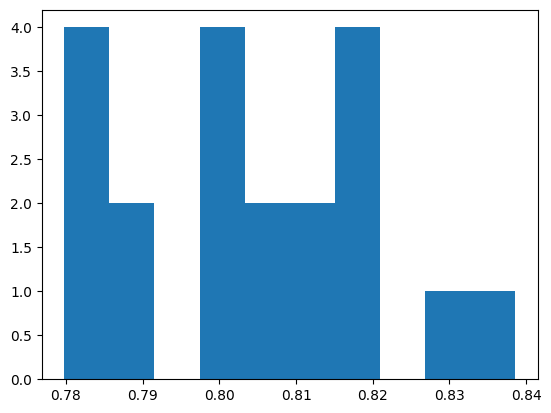

In [11]:
pylab.hist(resultados)

In [12]:
resultados

[np.float64(0.7869955156950673),
 np.float64(0.7797752808988764),
 np.float64(0.827354260089686),
 np.float64(0.8179775280898877),
 np.float64(0.7847533632286996),
 np.float64(0.7842696629213484),
 np.float64(0.8161434977578476),
 np.float64(0.7842696629213484),
 np.float64(0.8004484304932735),
 np.float64(0.8),
 np.float64(0.8183856502242153),
 np.float64(0.802247191011236),
 np.float64(0.8116591928251121),
 np.float64(0.8067415730337079),
 np.float64(0.820627802690583),
 np.float64(0.7887640449438202),
 np.float64(0.8385650224215246),
 np.float64(0.8044943820224719),
 np.float64(0.7982062780269058),
 np.float64(0.8112359550561797)]

In [13]:
modelo_anterior = 0.8041457147175896

In [14]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


(array([4., 2., 0., 4., 2., 2., 4., 0., 1., 1.]),
 array([0.77977528, 0.78565426, 0.79153323, 0.7974122 , 0.80329118,
        0.80917015, 0.81504913, 0.8209281 , 0.82680707, 0.83268605,
        0.83856502]),
 <BarContainer object of 10 artists>)

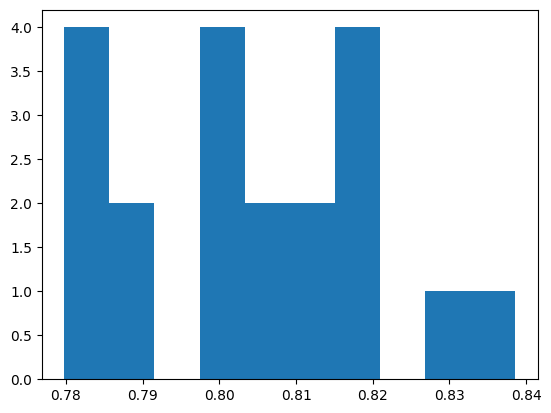

In [15]:
pylab.hist(resultados)

In [16]:
np.mean(resultados)

np.float64(0.8041457147175896)

In [17]:
x.head()

,Sex_binario,Age,Pclass,SibSp,Parch,Fare
0,0,22.0,3,1,0,7.2500
1,1,38.0,1,1,0,71.2833
2,1,26.0,3,0,0,7.9250
3,1,35.0,1,1,0,53.1000
4,0,35.0,3,0,0,8.0500


In [18]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [19]:
test[variaveis].head()

,Sex_binario,Age,Pclass,SibSp,Parch,Fare
0,0,34.5,3,0,0,7.8292
1,1,47.0,3,1,0,7.0000
2,0,62.0,2,0,0,9.6875
3,0,27.0,3,0,0,8.6625
4,1,22.0,3,1,1,12.2875


In [20]:
modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
modelo.fit(x, y)

p = modelo.predict(test[variaveis].fillna(-1))

In [21]:
# Criar Submission

In [22]:
sub = pd.Series(p, index = test['PassengerId'], name='Survived')
sub.shape

(418,)

In [23]:
sub.to_csv('modelo_video5.csv', header=True)

In [24]:
modelo.feature_importances_

array([0.2668296 , 0.25055132, 0.08282296, 0.04979339, 0.0454384 ,
       0.30456432])

In [25]:
modelo.n_estimators

100

In [26]:
accuracy = modelo.score(x, y)
accuracy

0.9820426487093153